In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load in the full cbb dataset
cbb = pd.read_csv('cbb_full_v2.csv')
#print the first few rows to check, and print the first and last years
print(cbb.head())

             TEAM CONF  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB  \
0  North Carolina  ACC  123.3   94.9   0.9531   52.6   48.1  15.4  18.2  40.7   
1       Wisconsin  B10  129.1   93.6   0.9758   54.8   47.7  12.4  15.8  32.1   
2        Michigan  B10  114.4   90.4   0.9375   53.9   47.7  14.0  19.5  25.5   
3      Texas Tech  B12  115.2   85.2   0.9696   53.5   43.0  17.7  22.8  27.4   
4         Gonzaga  WCC  117.8   86.3   0.9728   56.6   41.1  16.2  17.1  30.0   

   ...   FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T  SEED  YEAR   WIN_PCT  
0  ...  32.3  30.4  53.9  44.6  32.7  36.2   71.7   1.0  2016  0.825000  
1  ...  36.2  22.4  54.8  44.7  36.5  37.5   59.3   1.0  2015  0.900000  
2  ...  30.7  30.0  54.7  46.8  35.2  33.2   65.9   3.0  2018  0.825000  
3  ...  32.9  36.6  52.8  41.9  36.5  29.7   67.5   3.0  2019  0.815789  
4  ...  39.0  26.9  56.3  40.0  38.2  29.0   71.5   1.0  2017  0.948718  

[5 rows x 21 columns]


In [3]:
cbb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4249 entries, 0 to 4248
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TEAM     4249 non-null   object 
 1   CONF     4249 non-null   object 
 2   ADJOE    4249 non-null   float64
 3   ADJDE    4249 non-null   float64
 4   BARTHAG  4249 non-null   float64
 5   EFG_O    4249 non-null   float64
 6   EFG_D    4249 non-null   float64
 7   TOR      4249 non-null   float64
 8   TORD     4249 non-null   float64
 9   ORB      4249 non-null   float64
 10  DRB      4249 non-null   float64
 11  FTR      4249 non-null   float64
 12  FTRD     4249 non-null   float64
 13  2P_O     4249 non-null   float64
 14  2P_D     4249 non-null   float64
 15  3P_O     4249 non-null   float64
 16  3P_D     4249 non-null   float64
 17  ADJ_T    4249 non-null   float64
 18  SEED     816 non-null    float64
 19  YEAR     4249 non-null   int64  
 20  WIN_PCT  4249 non-null   float64
dtypes: float64(18)

In [4]:
#how many unique teams are in ind conference
print(cbb[cbb['CONF'] == 'ind']['TEAM'].nunique())
#print independent teams
print(cbb[cbb['CONF'] == 'ind']['TEAM'].unique())
#drop independent teams for now (they complicate conference analysis)
cbb = cbb[cbb['CONF'] != 'ind']

#how many unique conferences are there
print(cbb['CONF'].nunique())
#print unique conferences
print(cbb['CONF'].unique())

5
['NJIT' 'New Orleans' 'Cal St. Bakersfield' 'Hartford' 'Chicago St.']
34
['ACC' 'B10' 'B12' 'WCC' 'SEC' 'BE' 'Amer' 'P12' 'A10' 'MVC' 'AE' 'ASun'
 'BSky' 'BSth' 'BW' 'CAA' 'CUSA' 'Horz' 'Ind' 'Ivy' 'MAAC' 'MAC' 'MEAC'
 'MWC' 'NEC' 'OVC' 'Pat' 'SB' 'SC' 'Slnd' 'Sum' 'SWAC' 'WAC' 'GWC']


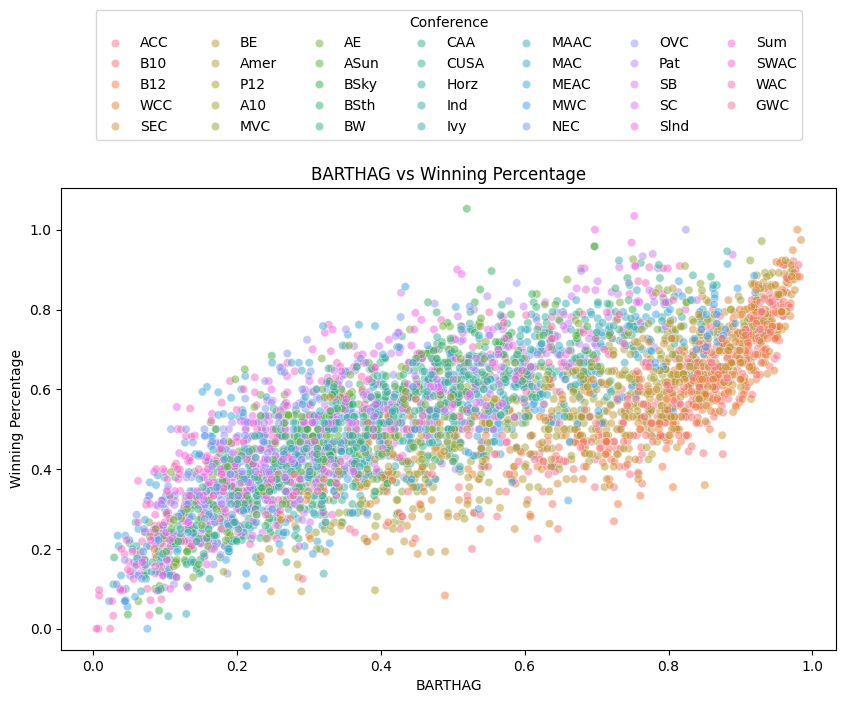

In [5]:
# First, lets see how the BARTHAG metric relates to number of wins, and color code by conference
plt.figure(figsize=(10,6))
sns.scatterplot(data=cbb, x='BARTHAG', y='WIN_PCT', hue='CONF', alpha=0.5)
#plot Florida in a different style
#sns.scatterplot(data=cbb[(cbb['TEAM'] == 'Florida')], x='BARTHAG', y='WIN_PCT', color='black', s=100, label='Florida', edgecolor='yellow', marker='X')

plt.legend(title='Conference', bbox_to_anchor=(0.5, 1.4), loc='upper center', ncol=7)
plt.title('BARTHAG vs Winning Percentage')
plt.xlabel('BARTHAG')
plt.ylabel('Winning Percentage')
plt.show()

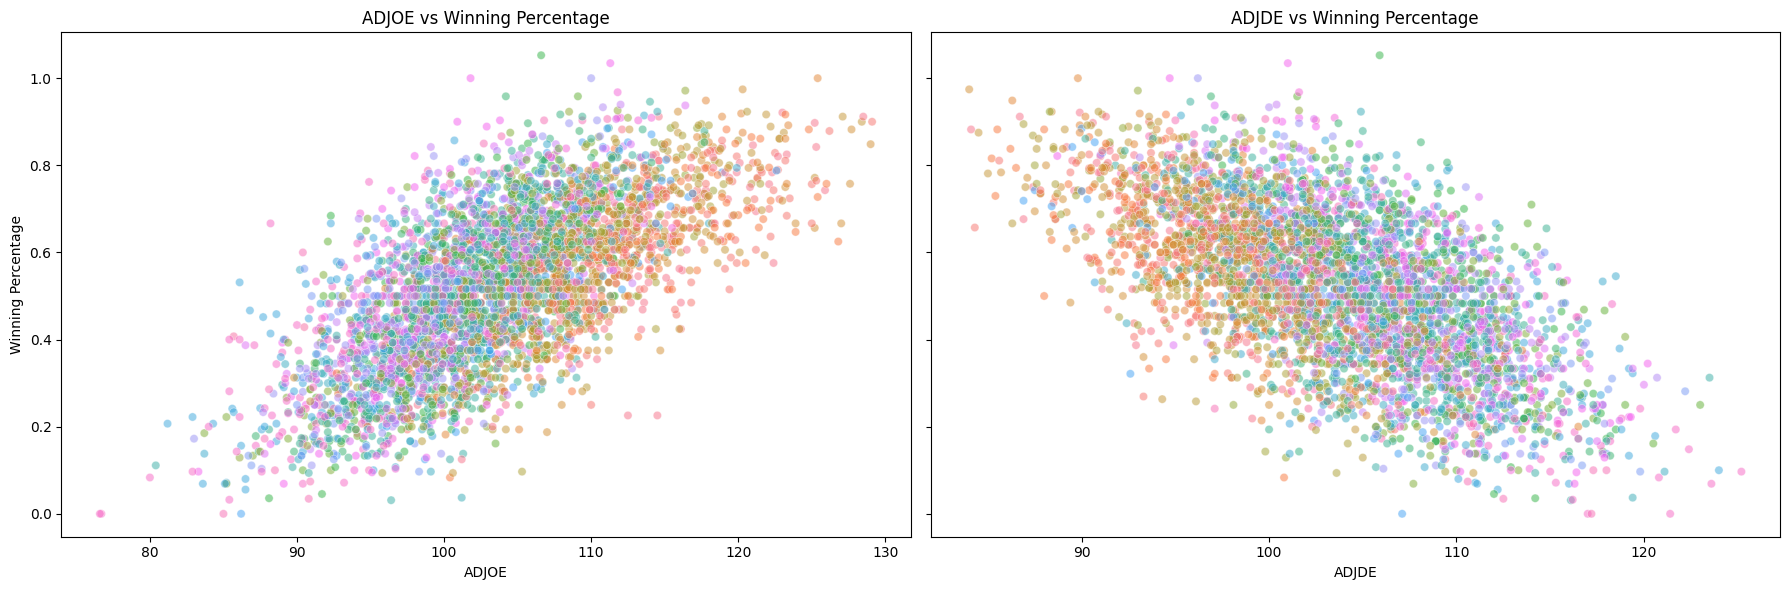

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Panel 1: ADJOE vs WIN_PCT
sns.scatterplot(data=cbb, x='ADJOE', y='WIN_PCT', hue='CONF', alpha=0.5, ax=axes[0])
#sns.scatterplot(data=cbb[(cbb['TEAM'] == 'Florida')], x='ADJOE', y='WIN_PCT', color='black', s=100, label='Florida', edgecolor='yellow', marker='X', ax=axes[0])
axes[0].set_title('ADJOE vs Winning Percentage')
axes[0].set_xlabel('ADJOE')
axes[0].set_ylabel('Winning Percentage')

# Panel 2: ADJDE vs WIN_PCT
sns.scatterplot(data=cbb, x='ADJDE', y='WIN_PCT', hue='CONF', alpha=0.5, ax=axes[1])
#sns.scatterplot(data=cbb[(cbb['TEAM'] == 'Florida')], x='ADJDE', y='WIN_PCT', color='black', s=100, label='Florida', edgecolor='yellow', marker='X', ax=axes[1])
axes[1].set_title('ADJDE vs Winning Percentage')
axes[1].set_xlabel('ADJDE')
axes[1].set_ylabel('Winning Percentage')

# Adjust legend for both panels
handles, labels = axes[0].get_legend_handles_labels()
#axes[0].legend(handles=handles, labels=labels, title='Conference', bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=8)
axes[1].legend([],[], frameon=False)  # Hide legend on second panel
axes[0].legend([],[], frameon=False)  # Hide legend on second panel

plt.tight_layout()
plt.show()

It is commonly known that there are a set of Power 5 conferences in basketball (ACC, Big Ten, Big 12, SEC, and Big East). Lets isolate these conferences for a quick analysis. I am going to throw in the WCC as well since they have a few "power like" schools. 

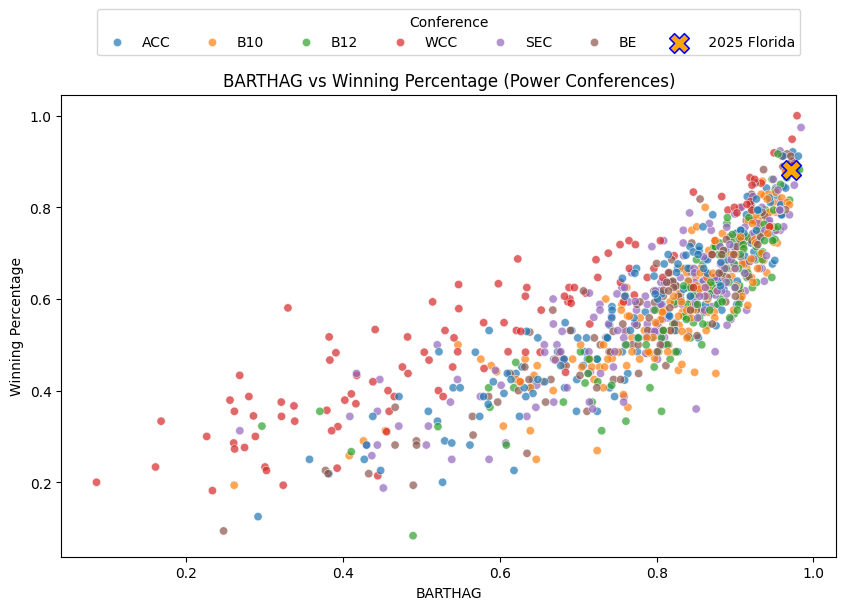

In [7]:
Power_confs = ['ACC', 'B10', 'B12', 'SEC', 'BE', 'WCC']
#Now make a plot isolating these conferences
plt.figure(figsize=(10,6))
sns.scatterplot(data=cbb[cbb['CONF'].isin(Power_confs)], x='BARTHAG', y='WIN_PCT', hue='CONF', alpha=0.7)
#plot points from 2025 Florida in a different style
sns.scatterplot(data=cbb[(cbb['TEAM'] == 'Florida') & (cbb['YEAR'] == 2025)], x='BARTHAG', y='WIN_PCT', color='orange', s=200, label=' 2025 Florida', edgecolor='blue', marker='X')
plt.legend(title='Conference', bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=7)
plt.title('BARTHAG vs Winning Percentage (Power Conferences)')
plt.xlabel('BARTHAG')
plt.ylabel('Winning Percentage')
plt.show()

The following box was just to see how much Gonzaga actually influences their conference. It turns out it is a lot!

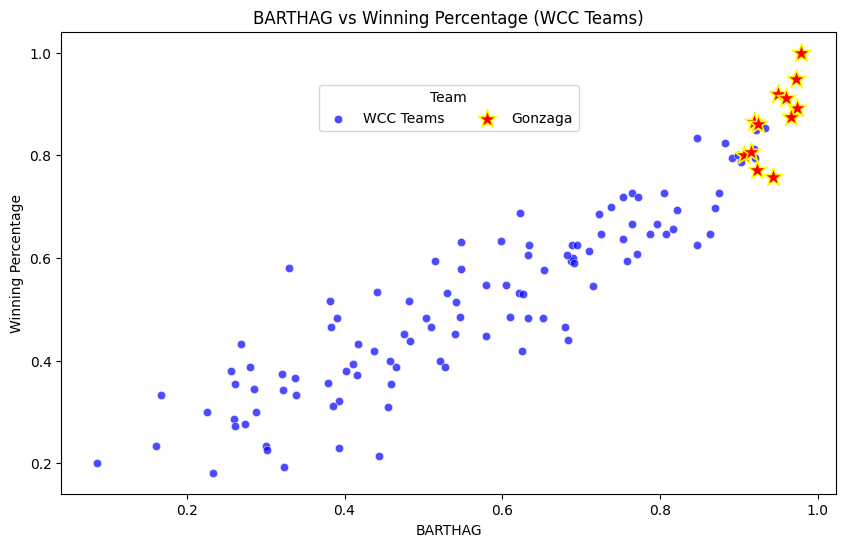

In [8]:
# Plot only WCC teams and highlight Gonzaga as stars
plt.figure(figsize=(10,6))
sns.scatterplot(data=cbb[cbb['CONF'] == 'WCC'], x='BARTHAG', y='WIN_PCT', color='blue', alpha=0.7, label='WCC Teams')
sns.scatterplot(data=cbb[(cbb['TEAM'] == 'Gonzaga') & (cbb['CONF'] == 'WCC')], x='BARTHAG', y='WIN_PCT', color='red', s=200, label='Gonzaga', marker='*', edgecolor='yellow')
plt.legend(title='Team', bbox_to_anchor=(0.5, 0.9), loc='upper center', ncol=2)
plt.title('BARTHAG vs Winning Percentage (WCC Teams)')
plt.xlabel('BARTHAG')
plt.ylabel('Winning Percentage')
plt.show()


That is pretty much all the best teams. 

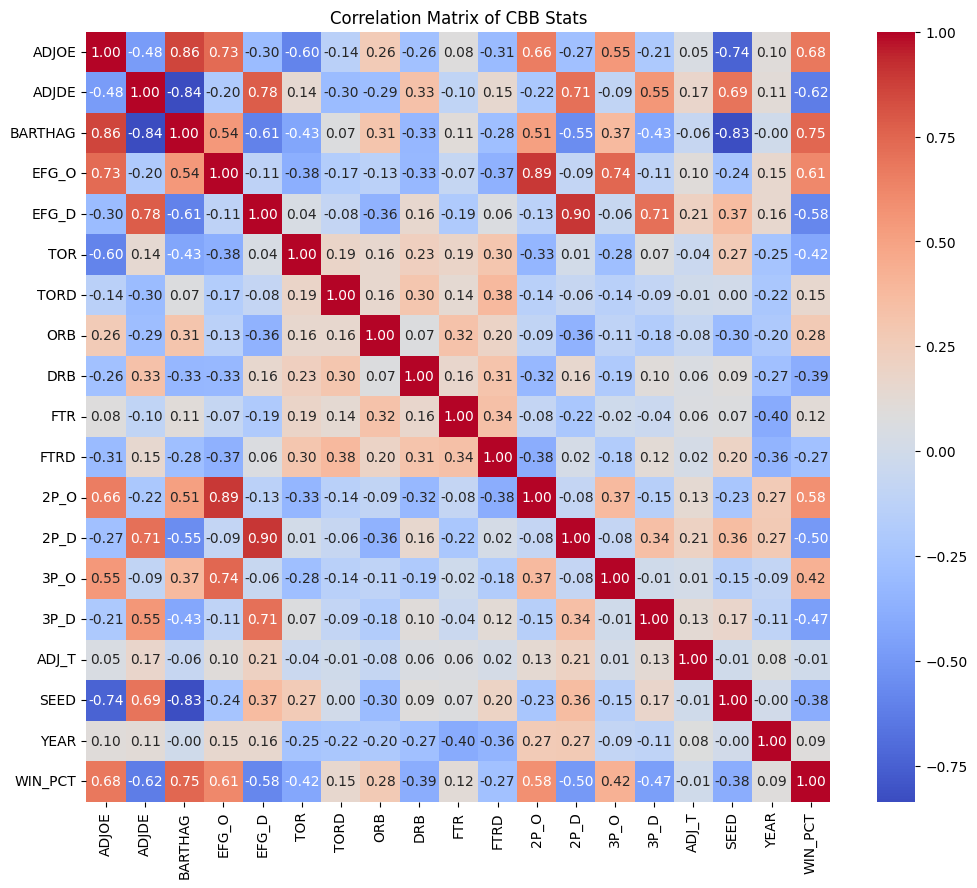

Highly correlated stat pairs (Correlation > 0.8):
      Stat1    Stat2  Correlation
1     ADJOE  BARTHAG     0.859630
18    ADJDE  BARTHAG    -0.835445
48  BARTHAG     SEED    -0.827681
58    EFG_O     2P_O     0.893834
73    EFG_D     2P_D     0.902699


In [9]:
# Lets look at correlations between different stats, but we nee to only consider numeric columns
numeric_cols = cbb.select_dtypes(include=[np.number]).columns
corr = cbb[numeric_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of CBB Stats')
plt.show()

# Which pairs of stats have highest correlations with one another (CORR > 0.8)?
high_corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool)).stack().reset_index()
high_corr.columns = ['Stat1', 'Stat2', 'Correlation']
high_corr = high_corr[abs(high_corr['Correlation']) > 0.8]
print("Highly correlated stat pairs (Correlation > 0.8):")
print(high_corr)

A ton of interesting things in this table, but we need to remove ratings that are highly correlated with one another. BARTHag is a good descriptor of things, as it is a pythagorean expectation of the win pct against an average basketball team. Essentially it is:

$ BARTHAG = 1/[1 + (\frac{ADJDE}{ADJOE})^{11.5}] $

Therefore, it is highly correlated with these things, and can be dropped later on. We will also drop the 2P_O, and 2P_D. Most baskets are 2 pointers anyway and it is a variation in the 3pt % that typically makes a difference anyways. 

In [10]:
cbb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4243 entries, 0 to 4248
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TEAM     4243 non-null   object 
 1   CONF     4243 non-null   object 
 2   ADJOE    4243 non-null   float64
 3   ADJDE    4243 non-null   float64
 4   BARTHAG  4243 non-null   float64
 5   EFG_O    4243 non-null   float64
 6   EFG_D    4243 non-null   float64
 7   TOR      4243 non-null   float64
 8   TORD     4243 non-null   float64
 9   ORB      4243 non-null   float64
 10  DRB      4243 non-null   float64
 11  FTR      4243 non-null   float64
 12  FTRD     4243 non-null   float64
 13  2P_O     4243 non-null   float64
 14  2P_D     4243 non-null   float64
 15  3P_O     4243 non-null   float64
 16  3P_D     4243 non-null   float64
 17  ADJ_T    4243 non-null   float64
 18  SEED     816 non-null    float64
 19  YEAR     4243 non-null   int64  
 20  WIN_PCT  4243 non-null   float64
dtypes: float64(18), int

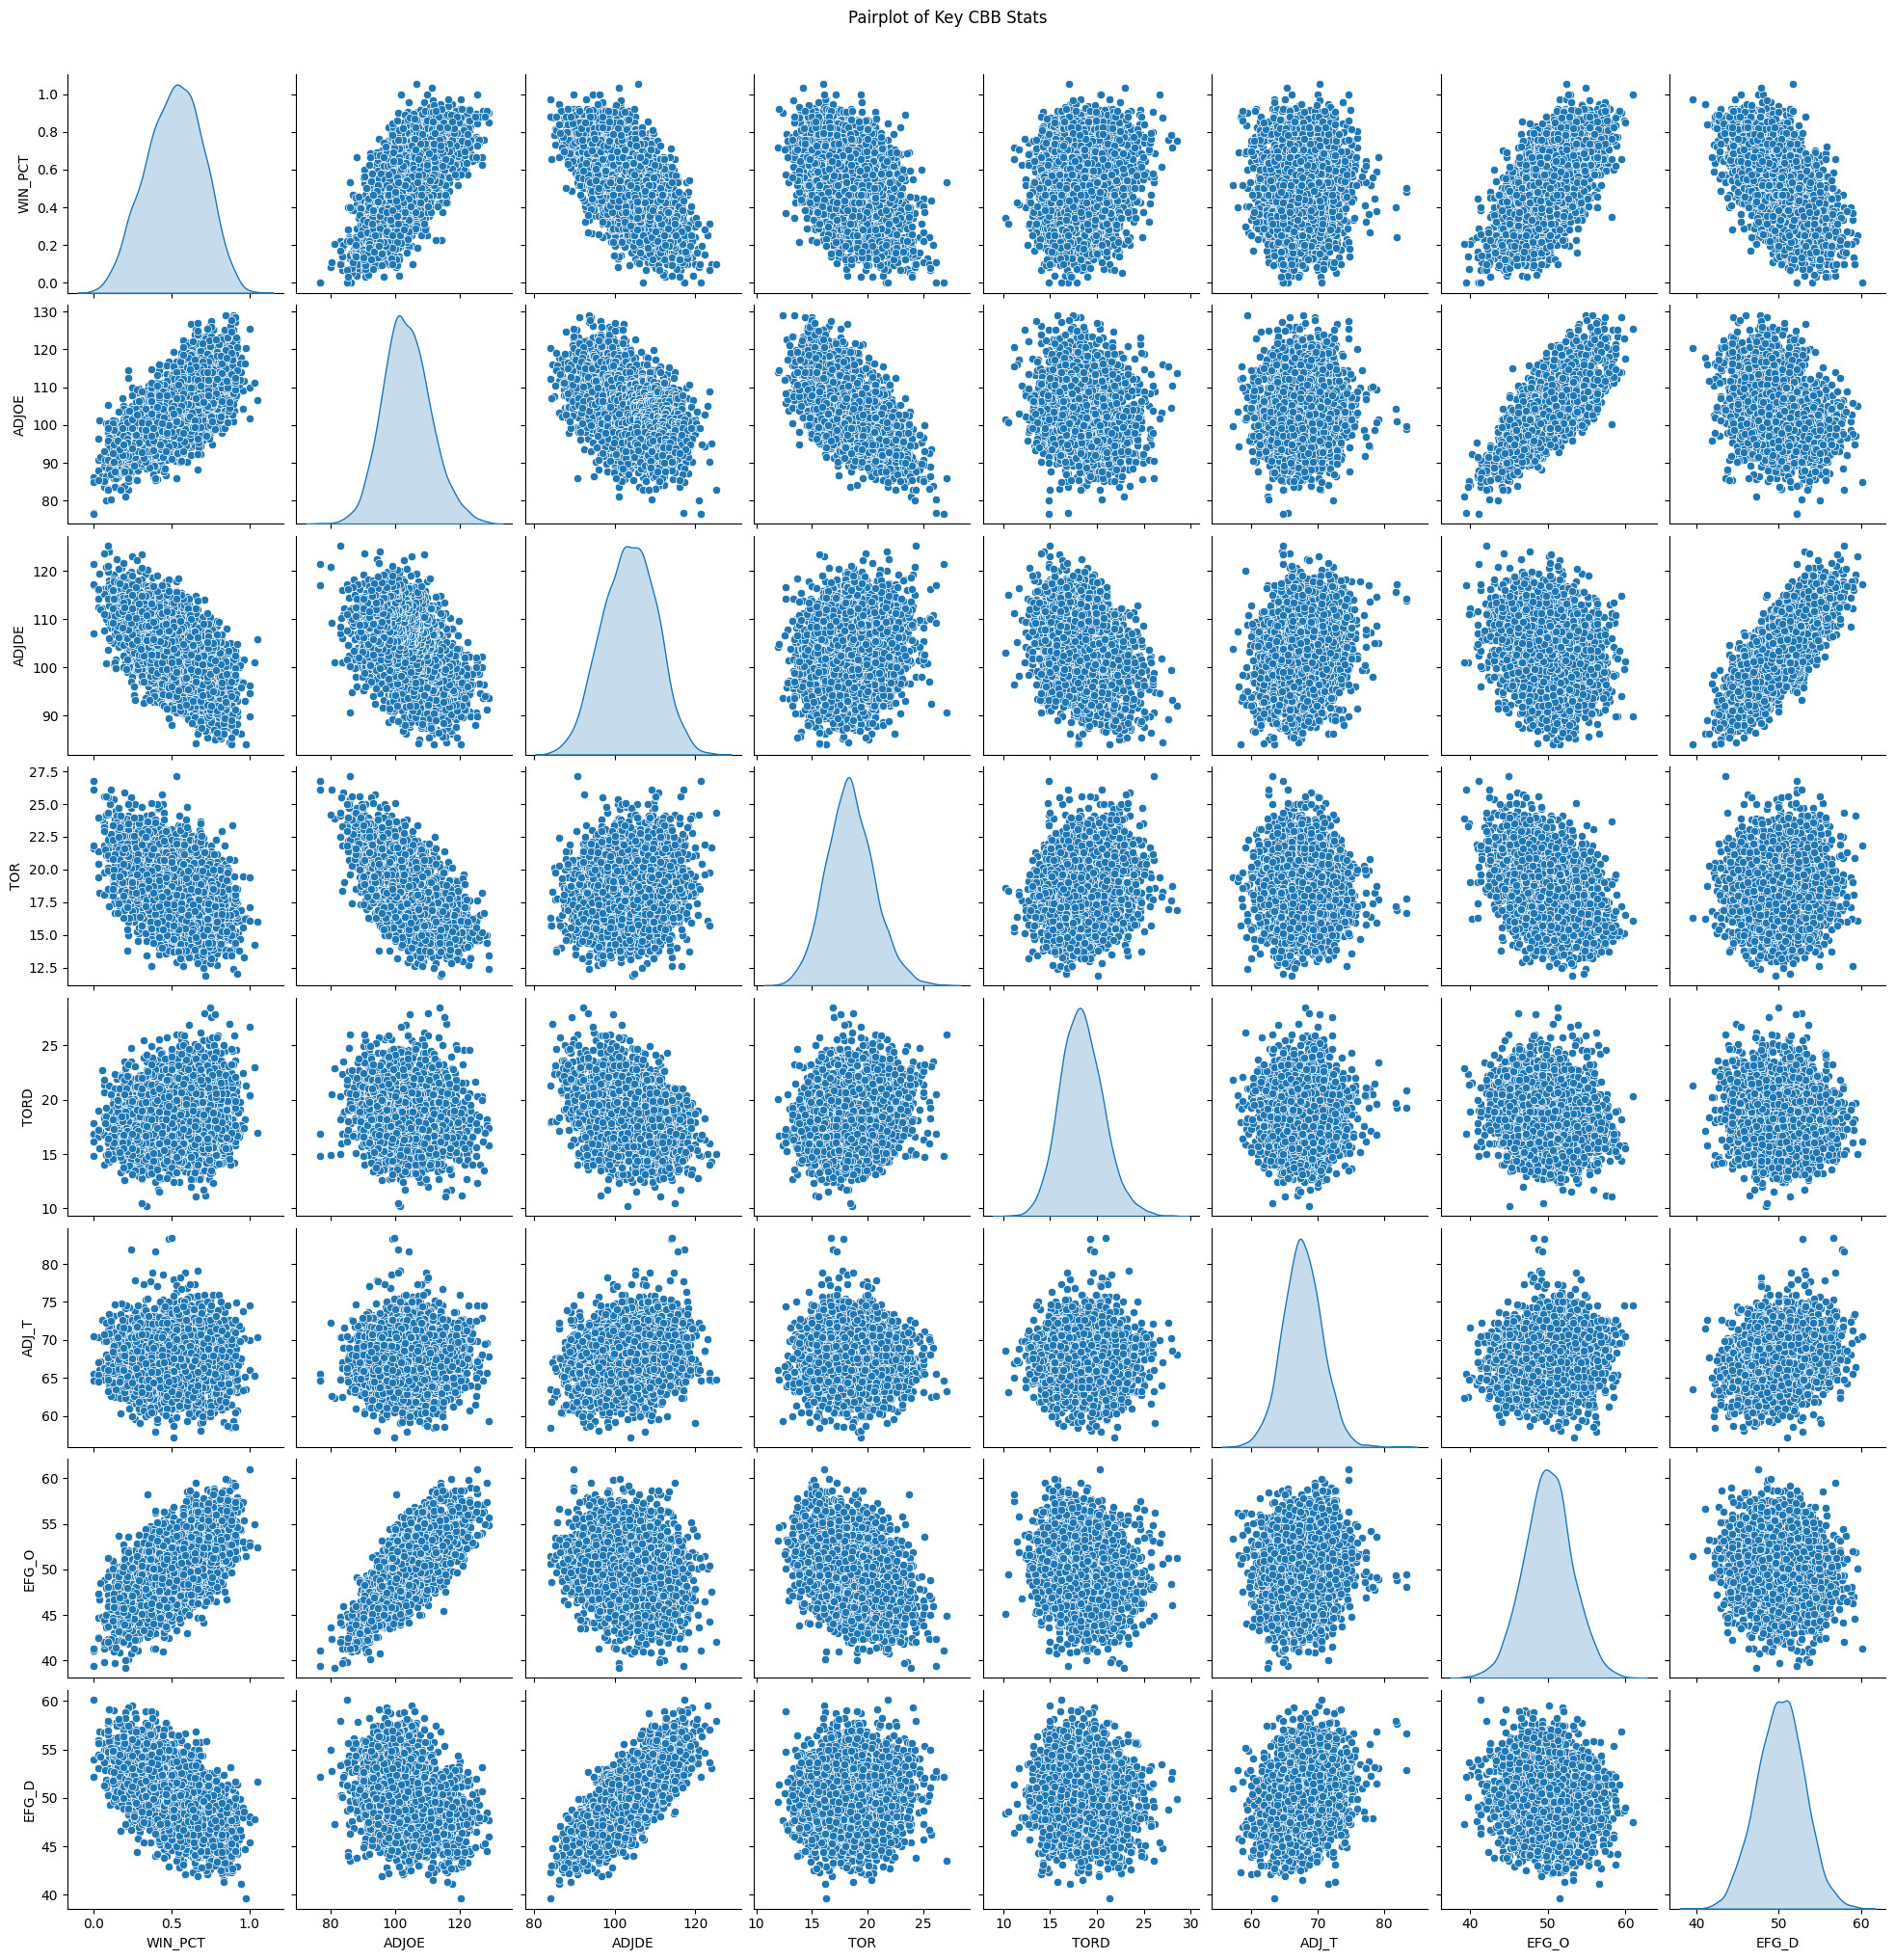

In [11]:
#Lets make a series of pair plots for some key stats
key_stats = ['WIN_PCT', 'ADJOE', 'ADJDE', 'TOR', 'TORD', 'ADJ_T', 'EFG_O', 'EFG_D']
sns.pairplot(cbb[key_stats], diag_kind='kde')
plt.suptitle('Pairplot of Key CBB Stats', y=1.02)
plt.show()

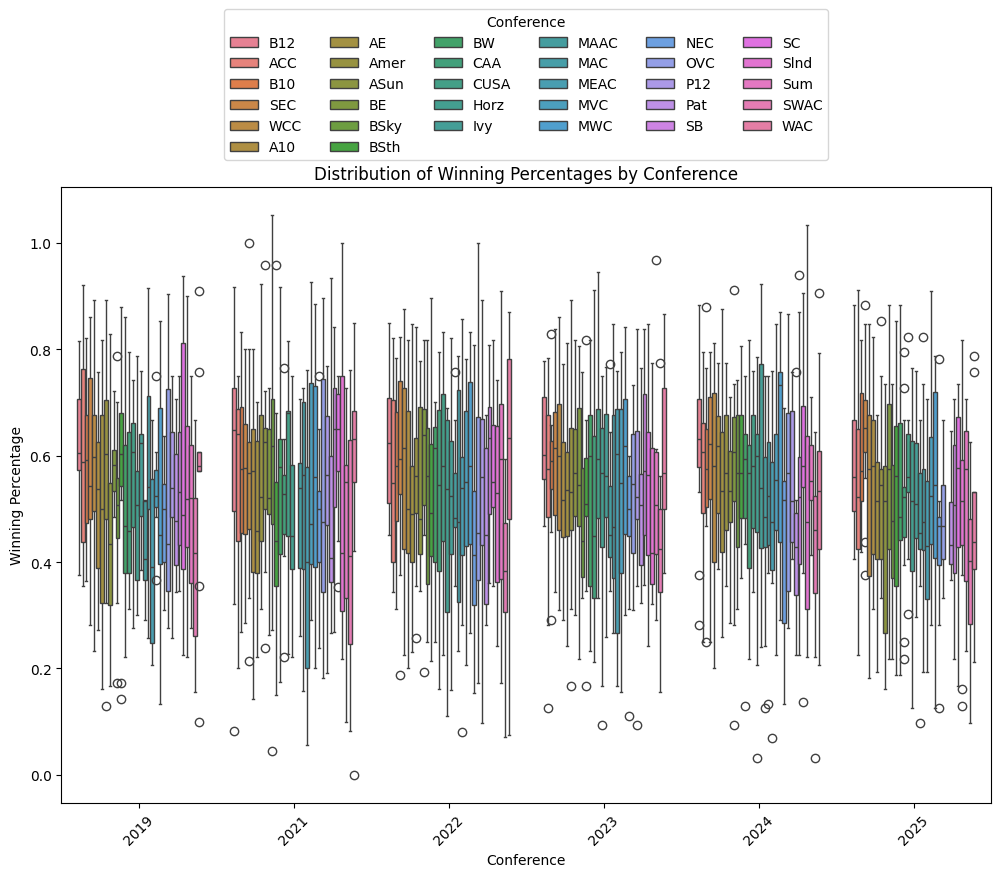

In [12]:
#Lets plot the distribution of win percentages by conference in a series of boxplots by year (2019-2025)
plt.figure(figsize=(12,8))
sns.boxplot(data=cbb[cbb["YEAR"].between(2019, 2025)], x='YEAR', y='WIN_PCT', hue='CONF')
plt.legend(title='Conference', bbox_to_anchor=(0.5, 1.3), loc='upper center', ncol=6)
plt.title('Distribution of Winning Percentages by Conference')
plt.xlabel('Conference')
plt.ylabel('Winning Percentage')
plt.xticks(rotation=45)
plt.show()

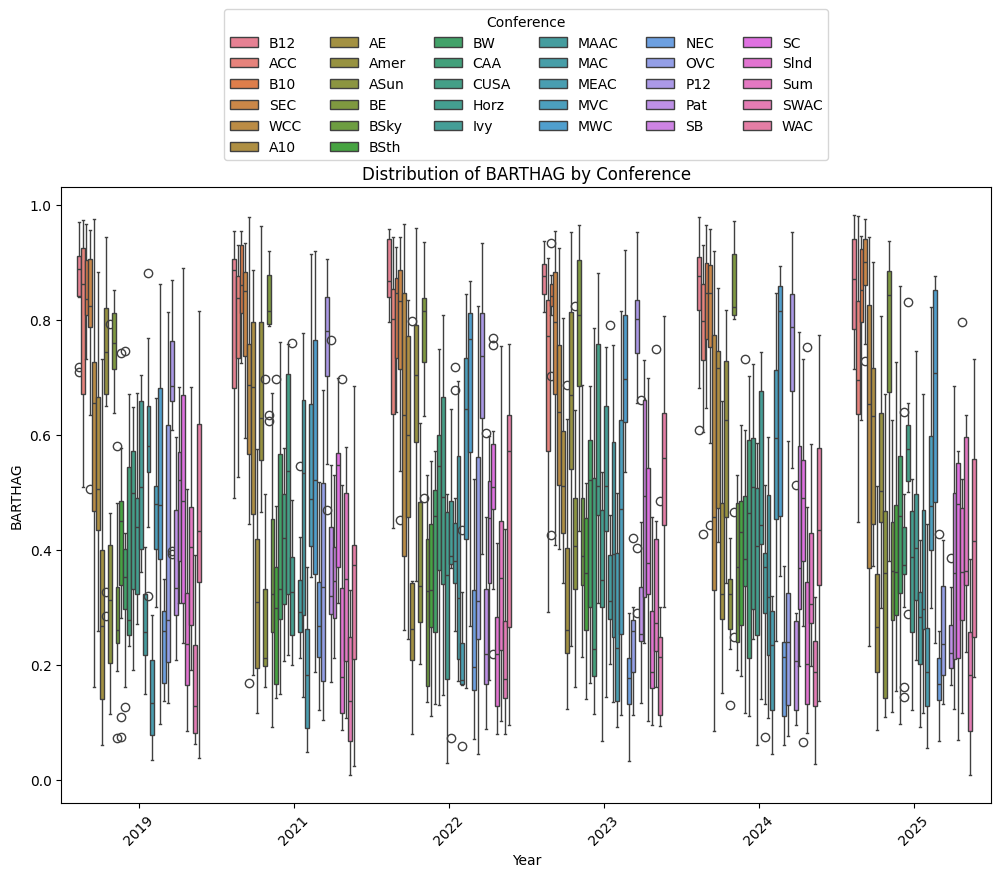

In [13]:
#Lets plot the distribution of win percentages by conference in a series of boxplots by year (2019-2025)
plt.figure(figsize=(12,8))
sns.boxplot(data=cbb[cbb["YEAR"].between(2019, 2025)], x='YEAR', y='BARTHAG', hue='CONF')
#sns.boxplot(data=cbb[cbb['CONF'].isin(Power_confs)], x='CONF', y='WIN_PCT', hue='YEAR')
plt.title('Distribution of BARTHAG by Conference')
plt.legend(title='Conference', bbox_to_anchor=(0.5, 1.3), loc='upper center', ncol=6)
plt.xlabel('Year')
plt.ylabel('BARTHAG')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Drop BARTHAG and 2P_O and 2P_D
cbb = cbb.drop(columns=['BARTHAG', '2P_O', '2P_D'])

Number of Power Conference Teams in Tournament by Year:
    YEAR  Num_Tourney_Teams
0   2013                 29
1   2014                 28
2   2015                 33
3   2016                 30
4   2017                 36
5   2018                 35
6   2019                 34
7   2021                 35
8   2022                 35
9   2023                 35
10  2024                 32
11  2025                 40


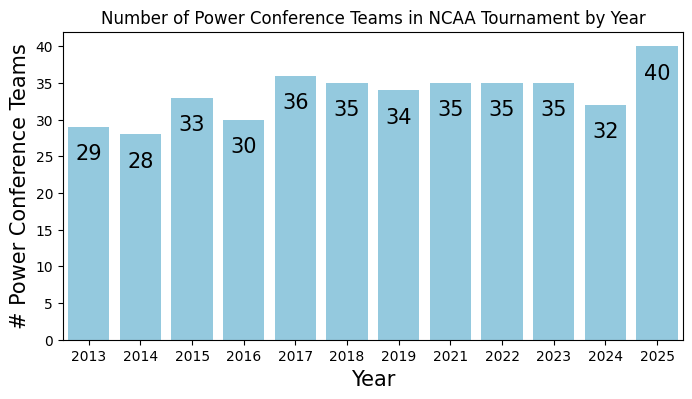

In [28]:
#how many teams in power conferences make the tournament each year? If seed is NaN, they didnt make it
power_conf_teams = cbb[cbb['CONF'].isin(Power_confs)]
tourney_counts = power_conf_teams.groupby('YEAR')['SEED'].apply(lambda x: x.notna().sum()).reset_index()
tourney_counts.columns = ['YEAR', 'Num_Tourney_Teams']
print("Number of Power Conference Teams in Tournament by Year:")
print(tourney_counts)

#plot this data in bar chart
plt.figure(figsize=(8,4))
sns.barplot(data=tourney_counts, x='YEAR', y='Num_Tourney_Teams', color='skyblue')

plt.title('Number of Power Conference Teams in NCAA Tournament by Year')
for i, bar in enumerate(plt.gca().patches):
    plt.gca().text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() - 5,
        int(bar.get_height()),
        ha='center',
        va='bottom',
        fontsize=15
    )
plt.xlabel('Year', fontsize=15)
plt.ylabel('# Power Conference Teams', fontsize=15)
plt.ylim(0, tourney_counts['Num_Tourney_Teams'].max() + 2)
plt.show()

In [16]:
cbb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4243 entries, 0 to 4248
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TEAM     4243 non-null   object 
 1   CONF     4243 non-null   object 
 2   ADJOE    4243 non-null   float64
 3   ADJDE    4243 non-null   float64
 4   EFG_O    4243 non-null   float64
 5   EFG_D    4243 non-null   float64
 6   TOR      4243 non-null   float64
 7   TORD     4243 non-null   float64
 8   ORB      4243 non-null   float64
 9   DRB      4243 non-null   float64
 10  FTR      4243 non-null   float64
 11  FTRD     4243 non-null   float64
 12  3P_O     4243 non-null   float64
 13  3P_D     4243 non-null   float64
 14  ADJ_T    4243 non-null   float64
 15  SEED     816 non-null    float64
 16  YEAR     4243 non-null   int64  
 17  WIN_PCT  4243 non-null   float64
dtypes: float64(15), int64(1), object(2)
memory usage: 629.8+ KB


In [17]:
#Now I will split the data into two final datasets for modeling. 
#One will be used to train and predict win pct, the other to predict based on making the tournament or not. 
cbb_winpct = cbb.copy()


#For win pct, we dont need the SEED, TEAM, or YEAR columns
cbb_winpct = cbb_winpct.drop(columns=['SEED', 'TEAM', 'YEAR'])
# for conference, replace a column if they are in the power conference label as true, else false
cbb_winpct['POWER_CONF'] = cbb_winpct['CONF'].apply(lambda x: 1 if x in Power_confs else 0)
#Then drop the original CONF column
cbb_winpct = cbb_winpct.drop(columns=['CONF'])
cbb_winpct.info()
cbb_winpct.head()

#This is sort of recursive, but drop 

cbb_winpct.to_csv('cbb_winpct_model_data.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 4243 entries, 0 to 4248
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ADJOE       4243 non-null   float64
 1   ADJDE       4243 non-null   float64
 2   EFG_O       4243 non-null   float64
 3   EFG_D       4243 non-null   float64
 4   TOR         4243 non-null   float64
 5   TORD        4243 non-null   float64
 6   ORB         4243 non-null   float64
 7   DRB         4243 non-null   float64
 8   FTR         4243 non-null   float64
 9   FTRD        4243 non-null   float64
 10  3P_O        4243 non-null   float64
 11  3P_D        4243 non-null   float64
 12  ADJ_T       4243 non-null   float64
 13  WIN_PCT     4243 non-null   float64
 14  POWER_CONF  4243 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 530.4 KB


In [18]:
#make a win pct version using one-hot encoding for conference
cbb_winpct_ohe = cbb.copy()
#For win pct, we dont need the SEED, TEAM, or YEAR columns
cbb_winpct_ohe = cbb_winpct_ohe.drop(columns=['SEED', 'TEAM', 'YEAR'])
#one-hot encode the CONF column
cbb_winpct_ohe = pd.get_dummies(cbb_winpct_ohe, columns=['CONF'], drop_first=True)
cbb_winpct_ohe.info()
cbb_winpct_ohe.head()
cbb_winpct_ohe.to_csv('cbb_winpct_ohe_model_data.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 4243 entries, 0 to 4248
Data columns (total 47 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ADJOE      4243 non-null   float64
 1   ADJDE      4243 non-null   float64
 2   EFG_O      4243 non-null   float64
 3   EFG_D      4243 non-null   float64
 4   TOR        4243 non-null   float64
 5   TORD       4243 non-null   float64
 6   ORB        4243 non-null   float64
 7   DRB        4243 non-null   float64
 8   FTR        4243 non-null   float64
 9   FTRD       4243 non-null   float64
 10  3P_O       4243 non-null   float64
 11  3P_D       4243 non-null   float64
 12  ADJ_T      4243 non-null   float64
 13  WIN_PCT    4243 non-null   float64
 14  CONF_ACC   4243 non-null   bool   
 15  CONF_AE    4243 non-null   bool   
 16  CONF_ASun  4243 non-null   bool   
 17  CONF_Amer  4243 non-null   bool   
 18  CONF_B10   4243 non-null   bool   
 19  CONF_B12   4243 non-null   bool   
 20  CONF_BE    42

In [19]:
#For tourney, we need to create a binary column for whether the team made the tournament or not
cbb_tourney = cbb.copy()
cbb_tourney['TOURNEY'] = np.where(cbb_tourney['SEED'].isnull(), 0, 1)
#Then we can drop the SEED, TEAM, and YEAR columns
cbb_tourney = cbb_tourney.drop(columns=['SEED', 'TEAM', 'YEAR'])
#for conference, replace a column if they are in the power conference label as true, else false
cbb_tourney['POWER_CONF'] = cbb_tourney['CONF'].apply(lambda x: 1 if x in Power_confs else 0)
#Then drop the original CONF column and WIN_PCT column
cbb_tourney = cbb_tourney.drop(columns=['CONF', 'WIN_PCT'])
cbb_tourney.info()
cbb_tourney.head()

cbb_tourney.to_csv('cbb_tourney_model_data.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 4243 entries, 0 to 4248
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ADJOE       4243 non-null   float64
 1   ADJDE       4243 non-null   float64
 2   EFG_O       4243 non-null   float64
 3   EFG_D       4243 non-null   float64
 4   TOR         4243 non-null   float64
 5   TORD        4243 non-null   float64
 6   ORB         4243 non-null   float64
 7   DRB         4243 non-null   float64
 8   FTR         4243 non-null   float64
 9   FTRD        4243 non-null   float64
 10  3P_O        4243 non-null   float64
 11  3P_D        4243 non-null   float64
 12  ADJ_T       4243 non-null   float64
 13  TOURNEY     4243 non-null   int64  
 14  POWER_CONF  4243 non-null   int64  
dtypes: float64(13), int64(2)
memory usage: 530.4 KB


In [20]:
# make a tourney version using one-hot encoding for conference
cbb_tourney_ohe = cbb.copy()
#For tourney, we need to create a binary column for whether the team made the tournament or not
cbb_tourney_ohe['TOURNEY'] = np.where(cbb_tourney_ohe['SEED'].isnull(), 0, 1)
#Then we can drop the SEED, TEAM, and YEAR columns
cbb_tourney_ohe = cbb_tourney_ohe.drop(columns=['SEED', 'TEAM', 'YEAR', 'WIN_PCT'])
#one-hot encode the CONF column
cbb_tourney_ohe = pd.get_dummies(cbb_tourney_ohe, columns=['CONF'], drop_first=True)
cbb_tourney_ohe.info()
cbb_tourney_ohe.head()
cbb_tourney_ohe.to_csv('cbb_tourney_ohe_model_data.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 4243 entries, 0 to 4248
Data columns (total 47 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ADJOE      4243 non-null   float64
 1   ADJDE      4243 non-null   float64
 2   EFG_O      4243 non-null   float64
 3   EFG_D      4243 non-null   float64
 4   TOR        4243 non-null   float64
 5   TORD       4243 non-null   float64
 6   ORB        4243 non-null   float64
 7   DRB        4243 non-null   float64
 8   FTR        4243 non-null   float64
 9   FTRD       4243 non-null   float64
 10  3P_O       4243 non-null   float64
 11  3P_D       4243 non-null   float64
 12  ADJ_T      4243 non-null   float64
 13  TOURNEY    4243 non-null   int64  
 14  CONF_ACC   4243 non-null   bool   
 15  CONF_AE    4243 non-null   bool   
 16  CONF_ASun  4243 non-null   bool   
 17  CONF_Amer  4243 non-null   bool   
 18  CONF_B10   4243 non-null   bool   
 19  CONF_B12   4243 non-null   bool   
 20  CONF_BE    42